In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

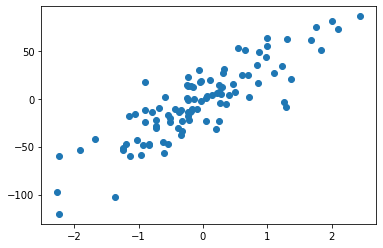

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
l=LinearRegression()

In [7]:
l.fit(X,y)
print(l.coef_)
print(l.intercept_)

[35.77059727]
-1.525952836373869


# WHEN "SLOPE m" IS FIXED AND "INTERCEPT b" IS CHANGING

In [14]:
m=35.77

In [15]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 35.77
        self.b = -120    #start with any value of b
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope,self.b)
            
        print(self.b)
        

In [16]:
gd = GDRegressor(0.001,66)

In [17]:
gd.fit(X,y)

-23694.801743129257 -96.30519825687074
-18955.8413945034 -77.34935686236733
-15164.673115602718 -62.18468374676461
-12131.738492482178 -50.052945254282434
-9705.39079398574 -40.34755446029669
-7764.312635188592 -32.5832418251081
-6211.450108150872 -26.371791716957226
-4969.1600865207 -21.402631630436524
-3975.3280692165586 -17.427303561219965
-3180.262455373246 -14.24704110584672
-2544.2099642985972 -11.702831141548122
-2035.367971438878 -9.667463170109244
-1628.2943771511023 -8.039168792958142
-1302.6355017208818 -6.73653329123726
-1042.1084013767056 -5.694424889860554
-833.6867211013644 -4.860738168759189
-666.9493768810913 -4.193788791878098
-533.5595015048732 -3.6602292903732248
-426.8476012038983 -3.2333816891693266
-341.4780809631188 -2.8919036082062077
-273.182464770495 -2.618721143435713
-218.5459718163961 -2.400175171619317
-174.83677745311684 -2.2253383941662
-139.86942196249365 -2.085468972203706
-111.89553756999474 -1.9735734346337113
-89.51643005599571 -1.8840570045777156


# WHEN "SLOPE m"  AND "INTERCEPT b" BOTH ARE CHANGING

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
ls = LinearRegression()

In [21]:
ls.fit(X_train,y_train)
print(ls.coef_)
print(ls.intercept_)

[35.48477395]
-1.4966266847569787


In [22]:
y_pred = ls.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5411537938863389

In [23]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [25]:
gdr = GDRegressor(0.001,50)

In [26]:
gdr.fit(X_train,y_train)

35.49670800490562 -1.5135895487872963


In [27]:
y_pred = gdr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5411823328821576